In [89]:
import warnings 
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
%matplotlib inline

In [2]:
# read excel file
# df_asli = pd.read_excel('./data/kemayoran 2000-2022.xlsx')
df_asli = pd.read_excel('./data/kemayoran bulanan.xlsx')

In [3]:
# ubah tipe data RR ke float
df_asli['RR'] = df_asli['RR'].replace(',','.', regex=True).astype(float)

In [4]:
df_asli

,Tanggal,RR
0,2016-01,163.8
1,2016-02,516.5
2,2016-03,350.1
3,2016-04,204.0
4,2016-05,156.3
...,...,...
67,2021-08,79.7
68,2021-09,113.4
69,2021-10,182.1
70,2021-11,134.1


In [5]:
# max value RR Data Asli
max_value = df_asli['RR']
max_value.max()

1043.2

In [6]:
# menyalin data asli ke data training
pd_train = df_asli
pd_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Tanggal  72 non-null     object 
 1   RR       72 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


In [66]:
# check nilai null
# jumlah null value train
pd_train.isna().sum()

Tanggal    0
RR         0
dtype: int64

In [67]:
pd_train

,Tanggal,RR
0,2016-01-01,163.8
1,2016-02-01,516.5
2,2016-03-01,350.1
3,2016-04-01,204.0
4,2016-05-01,156.3
...,...,...
67,2021-08-01,79.7
68,2021-09-01,113.4
69,2021-10-01,182.1
70,2021-11-01,134.1


In [68]:
# mengubah format tanggal dari object ke datetime
pd_train['Tanggal'] = pd.to_datetime(pd_train['Tanggal'], format="%Y-%m")
pd_train

,Tanggal,RR
0,2016-01-01,163.8
1,2016-02-01,516.5
2,2016-03-01,350.1
3,2016-04-01,204.0
4,2016-05-01,156.3
...,...,...
67,2021-08-01,79.7
68,2021-09-01,113.4
69,2021-10-01,182.1
70,2021-11-01,134.1


In [69]:
# cek NaN di df baru
nan_checker = pd_train.isnull().sum()
if nan_checker['RR'] == 0:
    # replace NaN ke 0
    df_predict_clean = pd_train.fillna(0)
else:
    df_predict_clean = pd_train

In [70]:
df_predict_clean.head()

,Tanggal,RR
0,2016-01-01,163.8
1,2016-02-01,516.5
2,2016-03-01,350.1
3,2016-04-01,204.0
4,2016-05-01,156.3


In [12]:
# replace abnormal value > 100
# cond_1 = df_predict_clean.loc[df_predict_clean['RR'] > 100, 'RR']
# cari maksimal value dalam dataframe df_predict_clean, selain diatas 500 (sudah abnormal)
# cond_1.loc[cond_1 < 500].max()

In [13]:
# mengganti abnormal value ke 277.5 di df_predict_clean
# df_predict_clean.loc[df_predict_clean['RR'] > 500, 'RR'] = 277.5
# df_predict_clean['RR'].max()

In [71]:
# pindah data clean ke train_df Dataframe
train_df = df_predict_clean
train_df.head()

,Tanggal,RR
0,2016-01-01,163.8
1,2016-02-01,516.5
2,2016-03-01,350.1
3,2016-04-01,204.0
4,2016-05-01,156.3


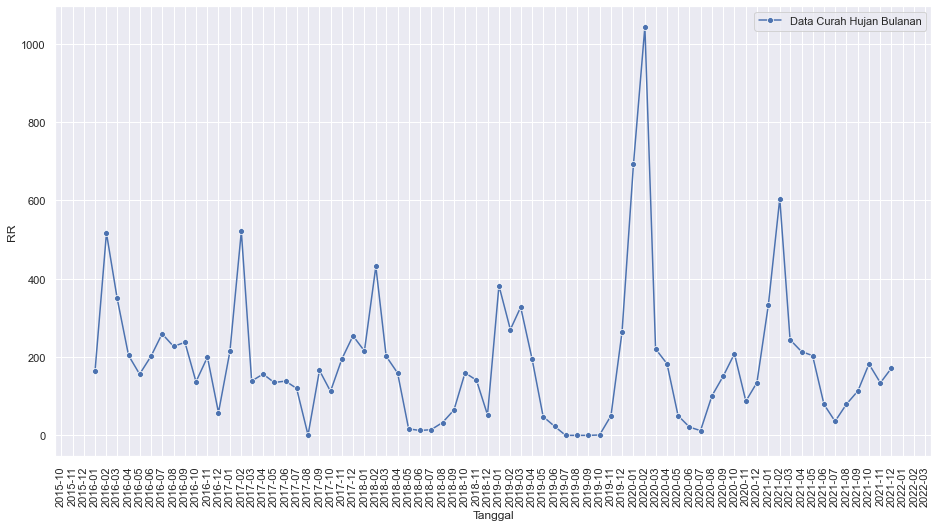

In [132]:
# plotting tahun 2020
# untuk mengganti, ganti df_rain_20 ke train_df dan hapus df_rain_20 dibawah ini
# df_rain_20 = train_df[train_df['Tanggal'] > '2019-12-31']
import matplotlib.dates as mdates

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y-%m') #This is a format. Will be clear in Screenshot

fig, ax = plt.subplots()
# locator = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(locator)
# ax.xaxis.set_minor_formatter(mdates.ConciseDateFormatter('\n%s'%(locator)))

ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(years_fmt)
ax.xaxis.set_minor_locator(months)

sns.set(rc={'figure.figsize':(15.7,8.27)})
sns.lineplot(x="Tanggal", y="RR",legend='full' ,data=train_df, marker = 'o', label='Data Curah Hujan Bulanan')

plt.xticks(rotation = 'vertical')
plt.show()

In [56]:
# apply mean
train_df['Average'] = train_df['RR'].rolling(window=6, center=True).mean()

In [57]:
train_df.head(10)

,RR,forecast,Average
Tanggal,,,
2016-01-01,163.8,0.000000,NaN
2016-02-01,516.5,163.165305,NaN
2016-03-01,350.1,468.861053,NaN
2016-04-01,204.0,308.002050,265.466667
2016-05-01,156.3,208.070096,281.383333
2016-06-01,202.1,179.553754,233.166667
2016-07-01,259.3,228.498759,214.383333
2016-08-01,227.2,228.608852,203.183333
2016-09-01,237.4,241.006626,210.450000


Text(0.5, 1.0, 'Curah Hujan Asli vs Prediksi 2021')

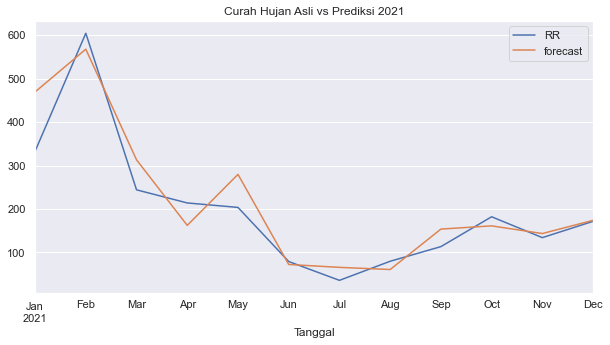

In [143]:
train_df.loc['2021-01-01':].plot(figsize=(10,5), grid=True)
plt.title('Curah Hujan Asli vs Prediksi 2021')

# Identifikasi Data

In [74]:
# set_index df_rain_20
train_df = train_df.set_index('Tanggal')
train_df.head()

,RR
Tanggal,
2016-01-01,163.8
2016-02-01,516.5
2016-03-01,350.1
2016-04-01,204.0
2016-05-01,156.3


<Figure size 1130.4x595.44 with 0 Axes>

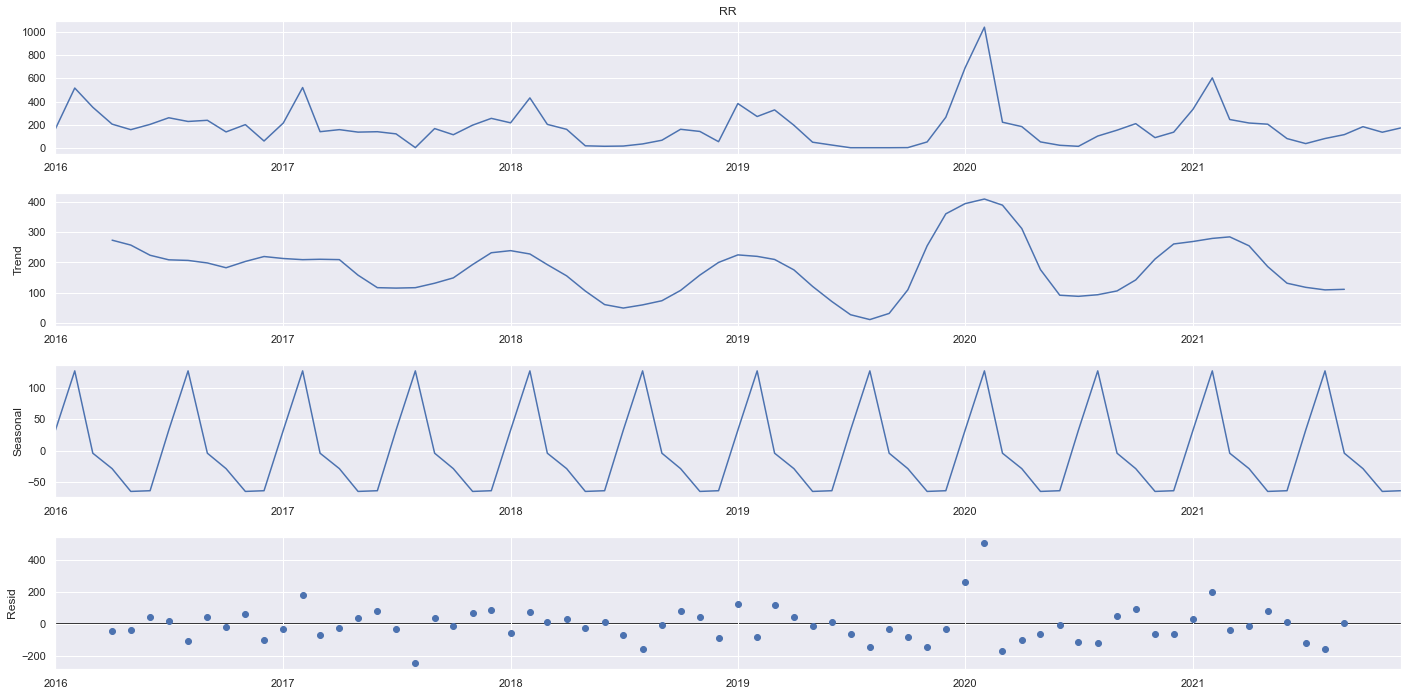

In [83]:
# Mencari sesaonal pada data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(train_df['RR'], model='additive',period=6)

fig = plt.figure()
fig = result.plot()
fig.set_size_inches(20,10)

# Analisis Data

In [19]:
#uji augmented dickey fuller, menemukan mean standar deviasi
# data tahun 2020 keatas
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, window = 15, cutoff = 0.01):
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='cyan', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='green', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show
    
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistik','p-value',
                                             '#Lags used','Number of Observation Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value (%s)' % key] = value
    
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely not-stationary.' % pvalue)
    
    print(dfoutput)

### Lakukan differencing jika data tidak stasioner

Results of Dickey-Fuller Test: 
p-value = 0.3573. The series is likely not-stationary.
Test Statistik                -1.847123
p-value                        0.357330
#Lags used                    11.000000
Number of Observation Used    60.000000
Critical value (1%)           -3.544369
Critical value (5%)           -2.911073
Critical value (10%)          -2.593190
dtype: float64


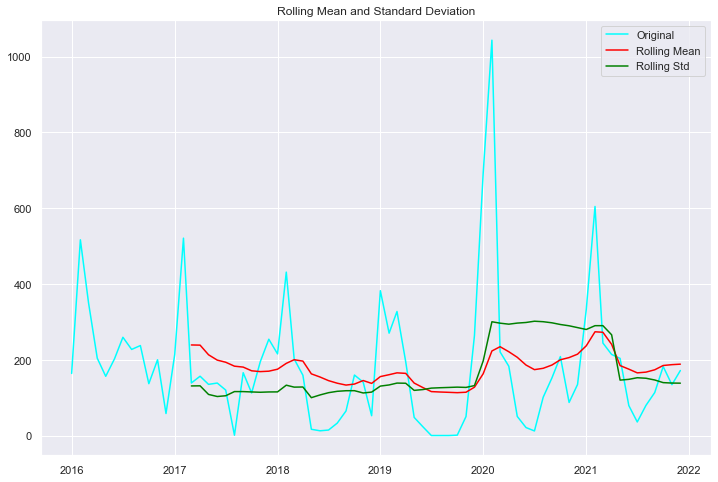

In [20]:
test_stationarity(train_df['RR'])

Results of Dickey-Fuller Test: 
p-value = 0.0000. The series is likely stationary.
Test Statistik               -8.871448e+00
p-value                       1.394419e-14
#Lags used                    7.000000e+00
Number of Observation Used    6.000000e+01
Critical value (1%)          -3.544369e+00
Critical value (5%)          -2.911073e+00
Critical value (10%)         -2.593190e+00
dtype: float64


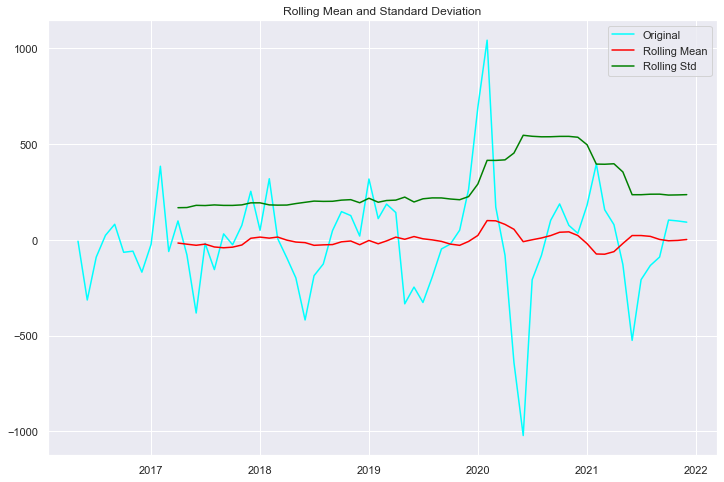

In [21]:
# differencing

first_diff = train_df.RR - train_df.RR.shift(4)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff, window = 12)

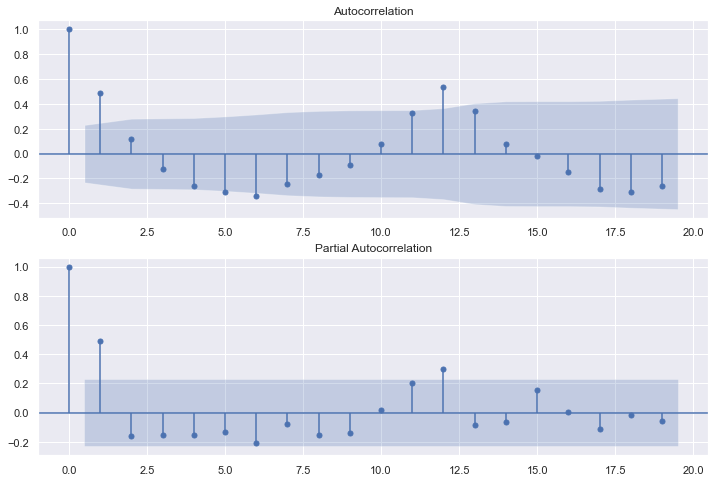

In [22]:
# sebelum diferencing
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_df.RR, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_df.RR, ax=ax2, method='ywm')

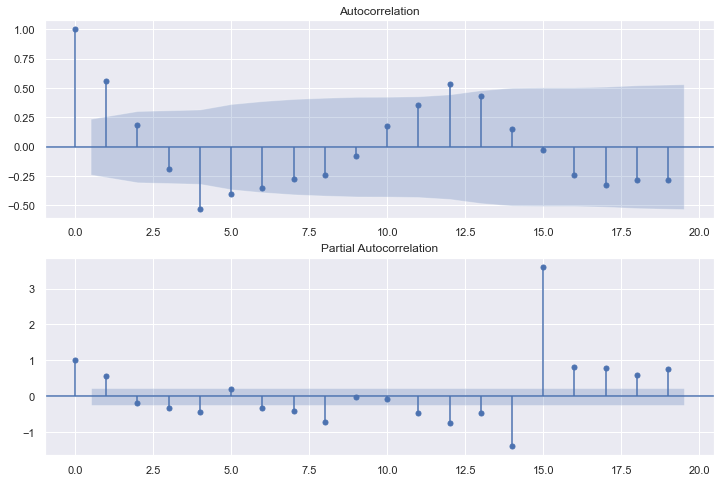

In [23]:
# setelah diferencing
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, ax=ax2)

In [24]:
# we can see a recurring correlation exists in both ACF and PACF hece we should choose SARIMAX model which also deals with seasonality

#RULE : A model with no orders of differencing assumes that the original series is stationary (mean-reverting). A model with one order of differencing assumes that 
      #the original series has a constant average trend (e.g. a random walk or SES-type model, with or without growth). A model with two orders of total differencing assumes that 
      #the original series has a time-varying trend 

#Since our series has a contant average trend ( with growth ) we would take I = 1 and MA = 0 ( I-1 ).


sarimax_mod = sm.tsa.statespace.SARIMAX(train_df.RR, trend='n', order=(14,1,0)).fit(disp=0)
print(sarimax_mod.summary())

C:\Users\ry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\ry\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


                               SARIMAX Results                                
Dep. Variable:                     RR   No. Observations:                   72
Model:              SARIMAX(14, 1, 0)   Log Likelihood                -445.274
Date:                Wed, 22 Jun 2022   AIC                            920.549
Time:                        10:40:29   BIC                            954.489
Sample:                    01-01-2016   HQIC                           934.046
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5605      0.122     -4.603      0.000      -0.799      -0.322
ar.L2         -0.5895      0.140     -4.217      0.000      -0.863      -0.316
ar.L3         -0.7093      0.185     -3.824      0.0

NormaltestResult(statistic=33.56431322897642, pvalue=5.1475667611624704e-08)


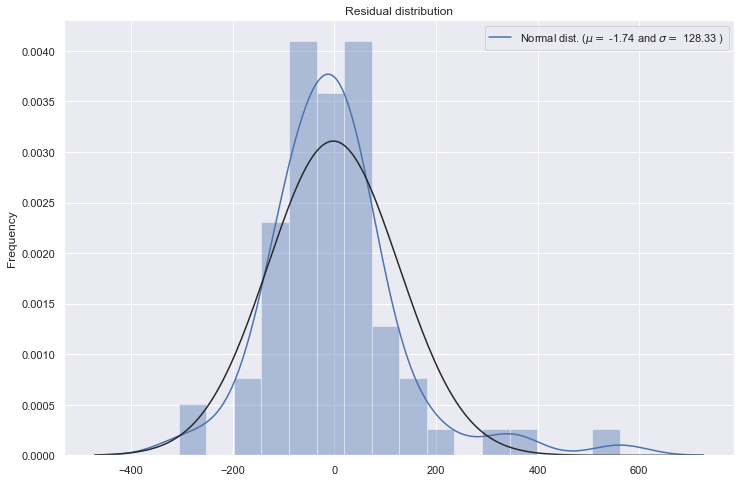

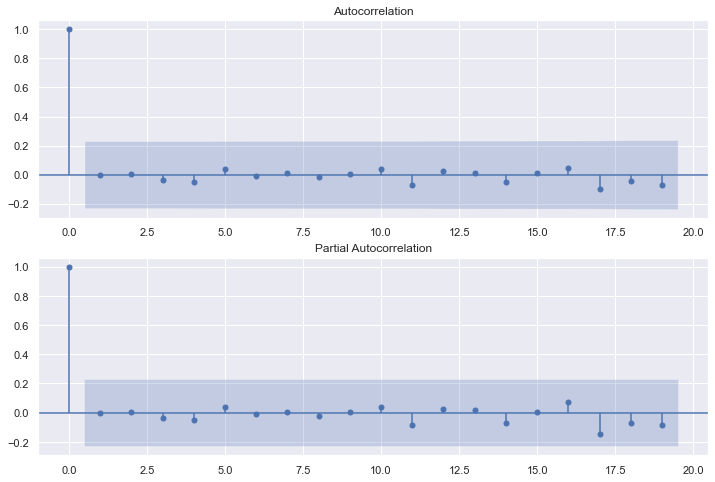

In [25]:
import scipy.stats as stats

resid = sarimax_mod.resid #gives residual degree of freedom (mu, sigma, pvalue ... )
print(stats.normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sarimax_mod.resid, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sarimax_mod.resid, ax=ax2)

# Forecast

In [26]:
# today = datetime.date.today() - timedelta(days=1)
# dimulai dari 1 januari 20
start_index = '2016-01-01'
start_index = pd.to_datetime(start_index, format="%Y-%m-%d")
# end_index = today.strftime("%Y-%m-%d")
end_index = '2021-12-01'
end_index = pd.to_datetime(end_index, format="%Y-%m-%d")
end_index

Timestamp('2021-12-01 00:00:00')

Text(0.5, 1.0, 'Perbandingan Curah Hujan Prediksi dan Asli tahun 2021')

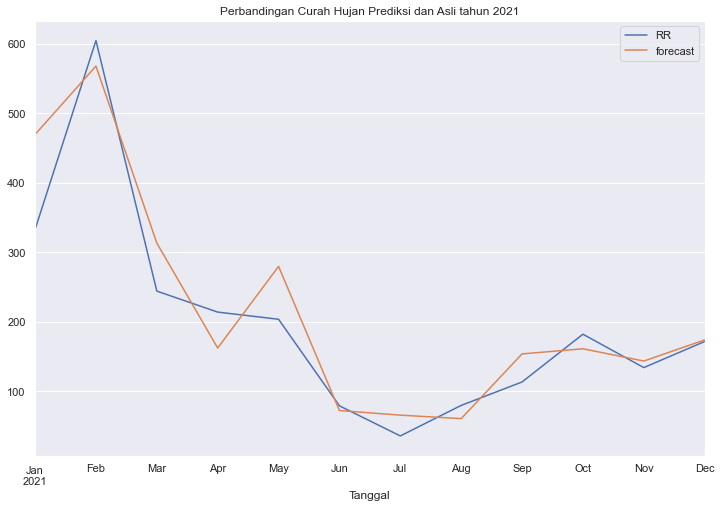

In [141]:
# menambahkan kolom prediksi pada dataframe dan membandingkan dengan data asli
# biru - asli
# orange - prediksi
# tahun 2021
train_df['forecast'] = sarimax_mod.predict(start= start_index,end = end_index,dynamic= False) 
train_df[start_index:][['RR', 'forecast']].loc['2021-01-01':'2021-12-01'].plot(figsize=(12, 8))
plt.title('Perbandingan Curah Hujan Prediksi dan Asli tahun 2021')

In [28]:
# cek selisih error
from sklearn.metrics import mean_absolute_error

forecast_errors = [train_df['forecast'][i]-train_df['RR'][i] for i in range(len(train_df))]
print('Forecast Errors: %s' % forecast_errors)

mae = mean_absolute_error(train_df['forecast'],train_df['RR'])
print('MAE:', mae)

Forecast Errors: [-163.8, -353.3346945388505, 118.76105292627847, 104.0020495819191, 51.77009638843606, -22.546246349623317, -30.801241458843066, 1.4088517190187133, 3.6066256455139865, 109.85308448109822, -55.79335714435959, 126.51169864566694, -45.61573206720624, -140.7638098868423, 257.41431860850435, -42.65818360524128, 46.4758610021118, 73.34793420289193, 102.48800531522213, 161.89893033134052, -20.554647826765404, 81.59328321329741, -24.131127790203692, -77.77788886068697, 50.40860497727695, -69.15520346540762, -2.6805575853323944, -47.75938364771994, 189.92098774029074, 37.3571488365793, 57.24769408331251, 10.60177634410919, 86.81739126822283, -4.342329245607232, 37.11244912737331, 172.1471320383568, -229.82121592956474, 99.39505191169314, -91.37766761782737, -42.957277998870126, 69.3889529050751, -4.179901799412271, 15.913331100069586, 31.72849523522518, 69.43767125963075, 108.9642960630291, 41.388787397084634, -160.0805631330587, -344.56036370883976, -561.7963613936669, 306.07

In [29]:
future_predict = sarimax_mod.predict(start= end_index ,end = end_index+timedelta(days=90) ,dynamic= True,)
future_predict

2021-12-01    173.902667
2022-01-01    331.427514
2022-02-01    414.745360
2022-03-01    264.794104
Freq: MS, Name: predicted_mean, dtype: float64

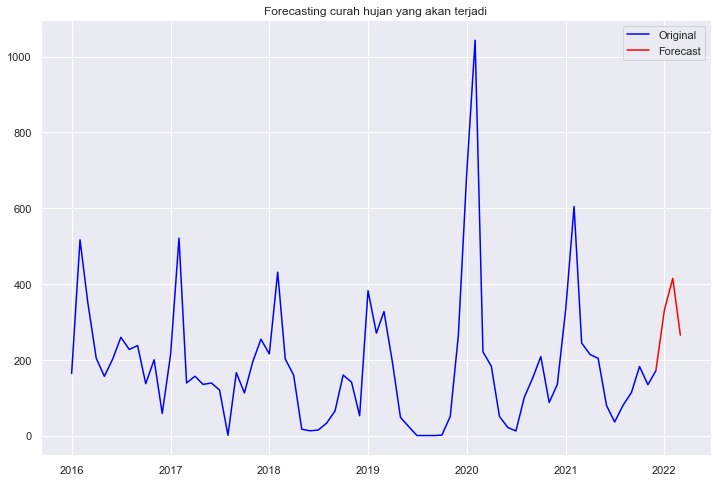

In [140]:
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(train_df['RR'], color='blue',label='Original')
fore = plt.plot(future_predict, color='red', label='Forecast')
plt.legend(loc='best')
plt.title('Forecasting curah hujan yang akan terjadi')
plt.show()

In [31]:
f_temp = pd.DataFrame()
f_temp['date'] = future_predict.index
f_temp['values'] = future_predict.values

In [32]:
f_temp

,date,values
0,2021-12-01,173.902667
1,2022-01-01,331.427514
2,2022-02-01,414.745360
3,2022-03-01,264.794104


In [33]:
f_temp.loc[-1] = [train_df.index[-1],train_df['RR'][-1]]

In [34]:
f_temp

,date,values
0,2021-12-01,173.902667
1,2022-01-01,331.427514
2,2022-02-01,414.745360
3,2022-03-01,264.794104
-1,2021-12-01,171.600000


In [35]:
f_temp.index = f_temp.index + 1
f_temp

,date,values
1,2021-12-01,173.902667
2,2022-01-01,331.427514
3,2022-02-01,414.745360
4,2022-03-01,264.794104
0,2021-12-01,171.600000


In [36]:
f_temp = f_temp.sort_index()
f_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5 non-null      datetime64[ns]
 1   values  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 120.0 bytes


In [37]:
f_temp = f_temp.set_index('date')

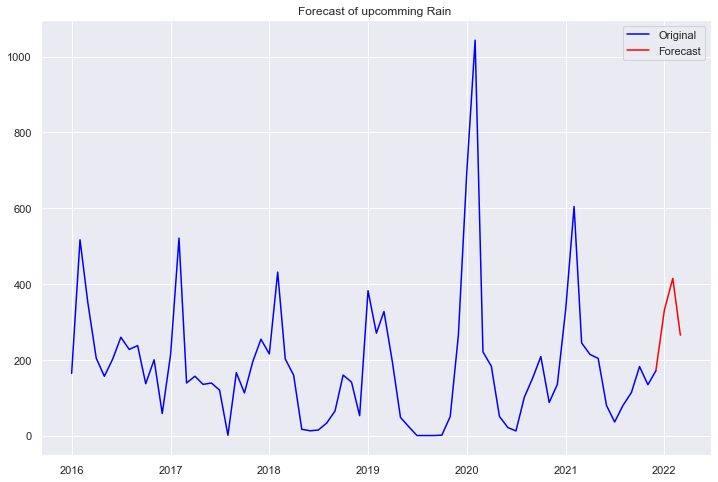

In [38]:
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(train_df['RR'], color='blue',label='Original')
fore = plt.plot(f_temp['values'], color='red', label='Forecast')
plt.legend(loc='best')
plt.title('Forecast of upcomming Rain ')
plt.show()

In [39]:
fcast = sarimax_mod.get_forecast(datetime.date.today()+timedelta(days=7))
fcast = fcast.conf_int()
fcast

,lower RR,upper RR
2022-01-01,88.721336,572.109503
2022-02-01,150.357274,678.377345
2022-03-01,-2.042161,531.908762
2022-04-01,-89.145300,445.604598
2022-05-01,-34.393214,505.534285
2022-06-01,-144.898318,396.652720
2022-07-01,-193.545909,348.873719


In [40]:
fcast = fcast.reset_index()
fcast.loc[-1] = [train_df.index[-1],train_df['RR'][-1],train_df['RR'][-1]]
fcast.index = fcast.index + 1
fcast = fcast.sort_index()
fcast['index'] = pd.to_datetime(fcast['index'], format="%d-%b-%y")
fcast = fcast.set_index('index')
fcast

,lower RR,upper RR
index,,
2021-12-01,171.600000,171.600000
2022-01-01,88.721336,572.109503
2022-02-01,150.357274,678.377345
2022-03-01,-2.042161,531.908762
2022-04-01,-89.145300,445.604598
2022-05-01,-34.393214,505.534285
2022-06-01,-144.898318,396.652720
2022-07-01,-193.545909,348.873719


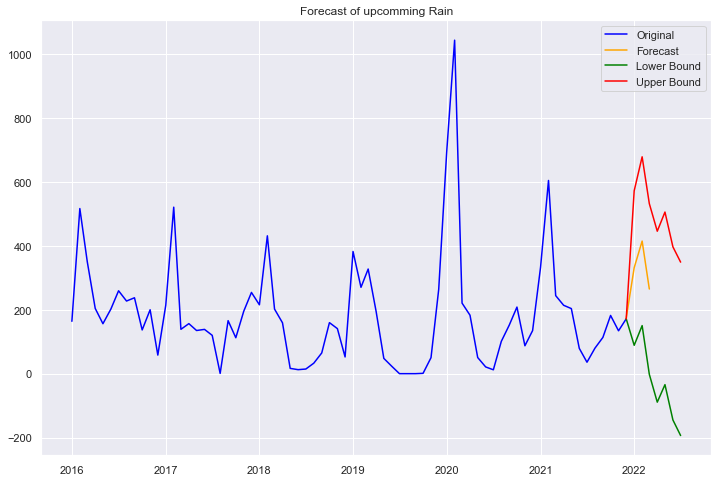

In [41]:
# predict lagi
figg = plt.figure(figsize=(12, 8))
orig = plt.plot(train_df['RR'], color='blue',label='Original')
fore = plt.plot(f_temp['values'], color='orange', label='Forecast')
lower = plt.plot(fcast['lower RR'], color='green', label='Lower Bound')
upper = plt.plot(fcast['upper RR'], color='red', label='Upper Bound')
plt.legend(loc='best')
plt.title('Forecast of upcomming Rain')
plt.show()